# Effect of Loan Data Characteristics on Borrower's Loan Status and Prosper scores
## by Nwani Ugonna Stanley

## Investigation Overview

In this investigation, I wanted to analyze the different characteristics of people that take loans and how it affects their ability to completely pay back their loans, also how it affects their Prosper score/ratings.

The main focus was on variables that showed interesting observations when comapred to the variables of interest i.e. LoanStatus and ProsperScore/ProsperRating.


## Dataset Overview

This dataset consists of information regarding people that take loans. The dataset contains 113,937 rows and 81 variables that depict the different chracteristics of Borrowers. 15 variables out of the 81 were used to conduct this investigation. Some of the variables are Employment status, how long a loan was taken for, whether the borrower was a home owner or not, loan amount and so on.

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')

# subset the data set to contain only columns that are important in this analysis.
important_cols = ['Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)',
                  'EmploymentStatus', 'IsBorrowerHomeowner', 'IncomeVerifiable', 'StatedMonthlyIncome', 'Investors',
                  'LoanCurrentDaysDelinquent', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'Recommendations']

# filter out the columns not listed above and assign to a new dataframe
loan_df = df[important_cols]

In [6]:
# According to the data dictionary, NaN values are marked as 0. So I am converting NaN values in this column to 'N/A' string
rating = {1.0: 'HR', 2.0: 'E', 3.0: 'D', 4.0: 'C', 5.0: 'B', 6.0: 'A', 7.0: 'AA', np.nan: 'N/A'}

# mapping integers to their values following the data dictionary
listing = {0: 'Not Available', 1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 4: 'Personal Loan',
           5: 'Student Use', 6: 'Auto', 7: 'Other', 8: 'Baby&Adoption', 9: 'Boat', 10: 'Cosmetic Procedure',
           11: 'Engagement Ring', 12: 'Green Loans', 13: 'Househole Expenses', 14: 'Large Purchases',
           15: 'Medical/Dental', 16: 'Motorcycle', 17: 'RV', 18: 'Taxes', 19: 'Vacation', 20: 'Wedding Loans'}

# effect changes using the map function
loan_df['ProsperRating (numeric)'] = loan_df['ProsperRating (numeric)'].map(rating)
loan_df['ListingCategory (numeric)'] = loan_df['ListingCategory (numeric)'].map(listing)

# rename columns
loan_df.rename(columns={'ProsperRating (numeric)': 'ProsperRating', 'ListingCategory (numeric)': 'ListingCategory'},
               inplace=True)

# convert ProsperRating to category datatype
rating = ['N/A', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
terms = [12, 36, 60]

prosper_rating = pd.api.types.CategoricalDtype(ordered=True, categories=rating)
term = pd.api.types.CategoricalDtype(ordered=True, categories=terms)

loan_df['ProsperRating'] = loan_df['ProsperRating'].astype(prosper_rating)
loan_df['Term'] = loan_df['Term'].astype(term)

## Distribution of Loan Status

People that take loans can be split into different categories; 
* Completed - meaning they have paid off their loans.
* Current - meaning they are still owing but they are paying as at when due.
* Defaulted - meaning that they have stopped paying their loans.
* Charged off - meaning that the loaner has given up on collecting the loan money back.
* Past due - meaning that the time range for their next payment has passed but they have not defaulted yet.
* Final payment in progress - meaning they are almost done paying their loan in full.

In [9]:
# list of values to change
change = ['Past Due (1-15 days)', 'Past Due (31-60 days)', 'Past Due (61-90 days)',
          'Past Due (91-120 days)', 'Past Due (16-30 days)', 'Past Due (>120 days)', 'Cancelled']

# loop through each value in the list above
for value in change:
    # if value contains 'Past Due' change to 'Past Due'
    if 'Past Due' in value:
        loan_df['LoanStatus'] = loan_df.LoanStatus.replace(value, 'Past Due')
    # everything else, change to 'Completed'
    else:
        loan_df['LoanStatus'] = loan_df.LoanStatus.replace(value, 'Completed')

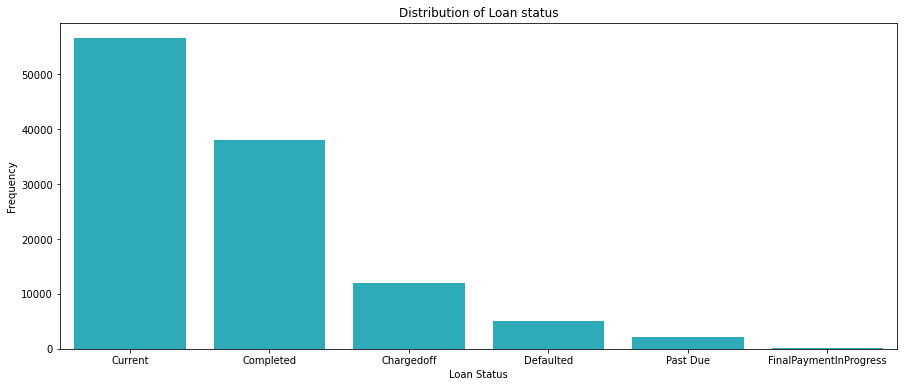

In [10]:
# set color
base_color = sns.color_palette()[9]

# figure size
plt.figure(figsize=(15, 6))

order = loan_df.LoanStatus.value_counts(ascending=False).index
sns.countplot(x='LoanStatus', data=loan_df, color=base_color, order=order);

# labels and title
plt.title('Distribution of Loan status');
plt.xlabel('Loan Status');
plt.ylabel('Frequency');

## Distribution of Length of loans

There were three terms that people could take loans for. People could take loans for 12 months, 36 months or 60 months

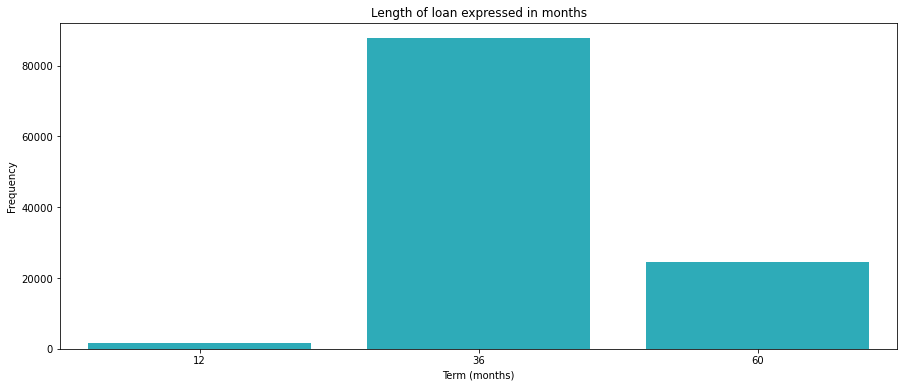

In [11]:
# figure size
plt.figure(figsize=(15, 6))

sns.countplot(x='Term', data=loan_df, color=base_color);

# labels and title
plt.title('Length of loan expressed in months');
plt.xlabel('Term (months)');
plt.ylabel('Frequency');

## Distribution of Employment Status

There were different categories of employment status for borrowers to choose from;

Employed (This could be Full-time, Part-time or Self employed), Full-time, Part-time, Self-employed, Retired, Not available, Not employed and Other

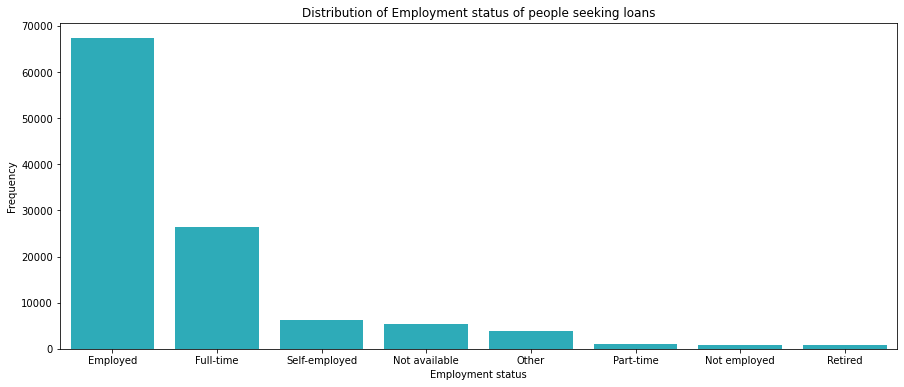

In [13]:
# figure size
plt.figure(figsize=(15, 6))

order = loan_df['EmploymentStatus'].value_counts(ascending=False).index
sns.countplot(x='EmploymentStatus', data=loan_df, color=base_color, order=order);

# labels and title
plt.title('Distribution of Employment status of people seeking loans');
plt.xlabel('Employment status');
plt.ylabel('Frequency');

## Prosper Score vs Prosper Rating

Using a bar chart to view this relationship, we see as expected that better Prosper ratings have a higher average Prosper score and worse Prosper ratings have lower Prosper scores.

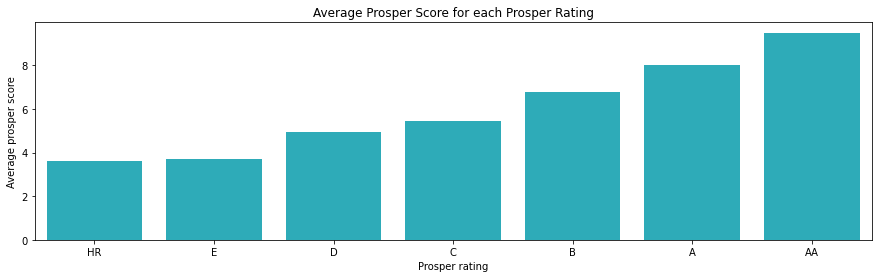

In [19]:
# figure size
plt.figure(figsize=(15, 4))

# exclude values with no bars
sns.barplot(data=loan_df, x='ProsperRating', y='ProsperScore', color=base_color, ci=None,
            order=['HR', 'E', 'D', 'C', 'B', 'A', 'AA']);

# labels and title
plt.title('Average Prosper Score for each Prosper Rating')
plt.xlabel('Prosper rating');
plt.ylabel('Average prosper score');

## Loan Amount vs Term

Plotting the loan amount against how long borrowers intend to repay their loans showed that people that took loans for longer periods of time were more comfortable taking higher amounts in loan.

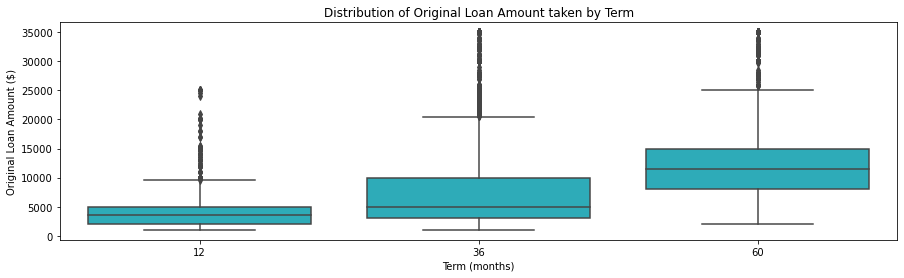

In [28]:
# figure size
plt.figure(figsize=(15, 4))

sns.boxplot(x='Term', y='LoanOriginalAmount', data=loan_df, color=base_color);

# labels and title
plt.title('Distribution of Original Loan Amount taken by Term');
plt.xlabel('Term (months)');
plt.ylabel('Original Loan Amount ($)');

## Employment status vs Prosper score

The Prosper score for borrowers that had a stable source of income (Full-time, Part-time and Retired) was higher in general than those whose incomes were not stable or those who were not employed (Self-employed, Not-employed). Retired Employment status are in the stable income bracket because monthly pensions count as a source of income.

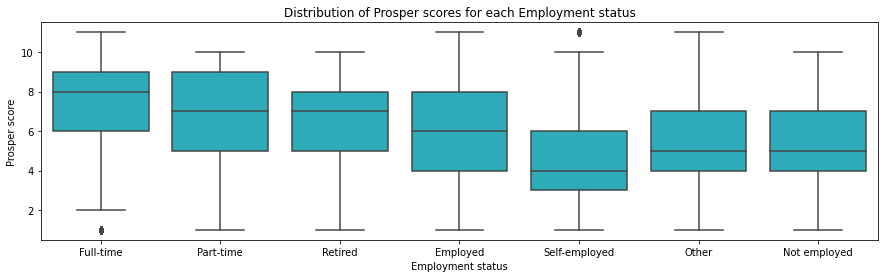

In [25]:
# figure size
plt.figure(figsize=(15, 4))

# order the plots to see pattern easily.
order = ['Full-time', 'Part-time', 'Retired', 'Employed', 'Self-employed', 'Other', 'Not employed']
sns.boxplot(x='EmploymentStatus', y='ProsperScore', data=loan_df, color=base_color, order=order);

# labels and title
plt.title('Distribution of Prosper scores for each Employment status');
plt.xlabel('Employment status');
plt.ylabel('Prosper score');

## Loan Amount vs Prosper Rating

Plotting the relationship between the Prosper rating of a borrower and how much the person takes as loan, we see that people with better Prosper ratings tend to take loans of higher amounts.

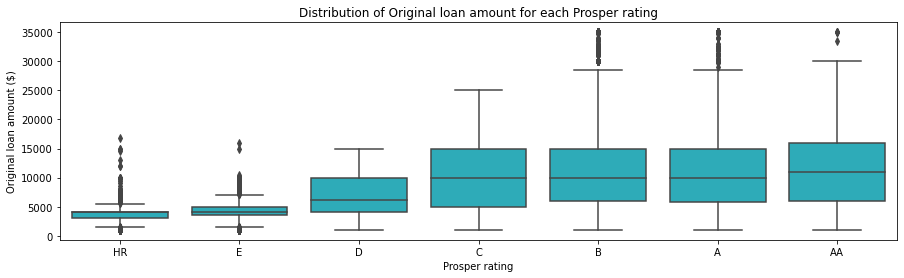

In [27]:
# figure size
plt.figure(figsize=(15, 4))

# order the plots to see pattern easily.
order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
sns.boxplot(x='ProsperRating', y='LoanOriginalAmount', data=loan_df, color=base_color, order=order);

# labels and title
plt.title('Distribution of Original loan amount for each Prosper rating');
plt.xlabel('Prosper rating');
plt.ylabel('Original loan amount ($)');

## Original loan amount and Prosper rating by Term

Diving deeper into the relationship seen from the previous plot, we see that the loan amount taken by borrowers also increases as the terms increase. Better prosper ratings combined with a longer borriwing term sees people take larger amounts in loan.

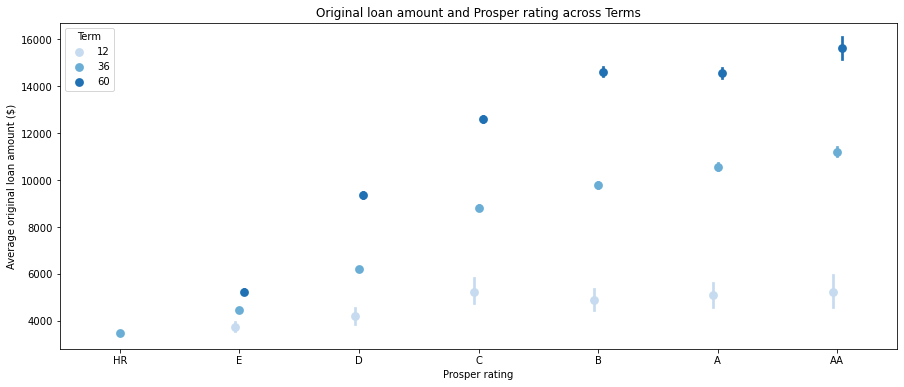

In [39]:
# figure size
plt.figure(figsize=(15, 6))

order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
sns.pointplot(data=loan_df, x='ProsperRating', y='LoanOriginalAmount', hue='Term', linestyles='',
              dodge=True, palette='Blues', order=order);

# labels and title
plt.title('Original loan amount and Prosper rating across Terms');
plt.xlabel('Prosper rating');
plt.ylabel('Average original loan amount ($)');
plt.legend(loc='upper left', title='Term');

## Original loan amount and Loan status by Home ownership

In this plot, I wanted to see if home ownership was a major influencer in how much a borrower takes in loan. This relationship is then plotted to show for the different status of loans. The plot shows that home ownership is indeed a major influencer in the amount a borrower takes in loan. Across all the Loan status categories, the average loan amount taken by a home owner is significantly greater than loans taken by non home owners.

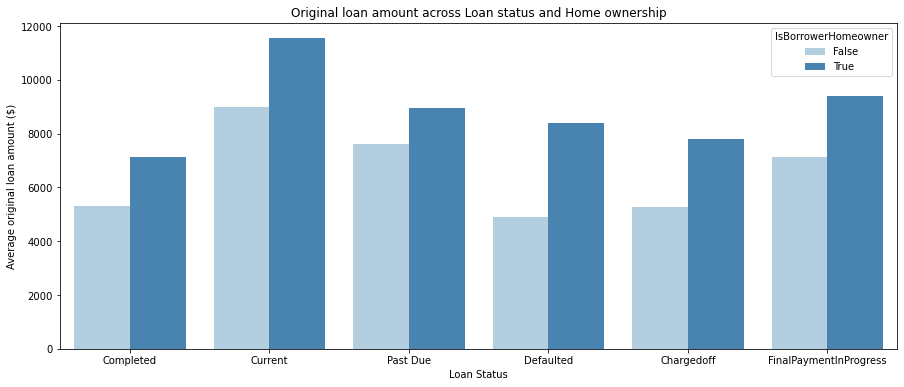

In [36]:
# figure size
plt.figure(figsize=(15, 6))

sns.barplot(data=loan_df, x='LoanStatus', y='LoanOriginalAmount', hue='IsBorrowerHomeowner', palette='Blues', ci=None);

# labels and title
plt.title('Original loan amount across Loan status and Home ownership')
plt.xlabel('Loan Status');
plt.ylabel('Average original loan amount ($)');

## Feedback

After doing the explanatory visualizations, I showed them to my friend (who has no knowledge of Data Analysis or Statistics by the way) and the following things were pointed out. 
* The histograms were not really understood. She preferred bar plots as they were easier to understand.
* She suggested that I arrange the boxplots in order of highest median so that it becomes easy to see and compare the differences.
* I removed the wicks that showed confidence intervals on my bar plots because she didn't understand what they meant and after explaining , she said it was not necessary.
* I tried removing the y-axis for count plots and placing the values on top of the bars but she preferred the y-axis.
* She suggested I choose a singular color for all the visualizations so I changed all the vizzes to shades of blue.